In [1]:
'''
6장 검증지표(Evaluation Metrics)와 잔차진단(Residuals Diagnostics) 방향
- 검증지표: 예측값과 실제값이 얼마나 비슷한지를 측정하는 것
- 잔차진단: 우리가 무엇을 더 할 수 있는지 평가하는 것

1) 검증지표
- 문제해결 검증지표: 문제를 잘 해결했는지 평가하기 위한 기준
statistical Metrics: Correlation
Input: -무한대 ~ 무한대 범위의 연속형 값
output: 이론적으로 -1 ~ 범위의 연속형 값

Regression Metrics: MSE, MSPE, RMSE, RMSLE, MAE, MAPE, MPE, R2, Adjusted R2
Input: -무한대 ~ 무한대 범위의 연속형 값
output: 이론적으로 0 ~ 무한대 범위의 연속형 값

Classfication Metrics: Log Logss, Cross-entropy, ROC, AUC, Gini, Confusion Matrix, Accuracy, Precision, Recall, F1-score, 
Classification Report, KS Statistic, Concordant_Discordant Ratio
Input: -무한대 ~ 무한대 범위의 연속형 값
output: 알고리즘 종류에 따라 출력이 달라질 수 있음
    확률(probability): 0~1 범위의 연속형 값(Logistic Regression, Random Forest, Gradient Bossting, Adaboost)
    집단(class): 0 또는 1의 이산형 값 (SVM, KNN) 

- 알고리즘비교 검증지표
① 어떤 알고리즘이 더 성능이 좋은지 평가하기 위한 기준
② 알고리즘 성능이 좋은것과 문제 해결이 가능한 것은 다르기에, 알고리즘 검증지표는 없어도 되지만 문제해결 검증지표는 반드시 필요함
③ (이론적)알고리즘은 그저 특정 검증지표를 사용하여 만들어짐
--> 일관성 있게 성능이 표현되는지가 중요함
'''


'''
6-2장 과소적합/과적합/편향/분산 이해하기

1) 검증 유의점(Underfitting vs Overfitting)
- 과소적합(Underfitting): 단순모델 또는 높은편향(충분하지 않은 데이터패턴 학습) // 모델이 데이터를 제대로 표현하지 못 한 상황
- 과적합(Overfitting): 복잡한 모델 또는 높은 분산(주어진 데이터 패턴에만 효과) // 모든 데이터의 딱 들어 맞도록 복잡하게 구성된 모델
학습이 된 데이터에만 효과가 크고 학습되지 않은 다른 데이터는 효과가 없음
① 원인: 독립변수 갯수에 비해 추정해야할 파라미터/모수의 수가 과도하게 큰 경우
② 원인: 독립변수가 서로 독립이 아닌 경우 -> 똑같은 변수를 2번 학습하는 행위임


2) 편향-분산 상충관계(Bias-variance Trade-off)
- 편향과 분산의 정의
① 편향(Bias): 점추정 //
    → 예측값과 실제값의 차이
    → 모델 학습시 여러 데이터로 학습 후 예측값의 범위가 정답과 얼마나 멀리 있는지 추정
    
② 편향(Bias(Real)): 모형화(단순화)로 미처 반영하지 못한 복잡성
    → 편향이 작다면 Training 데이터 패턴(복잡성)을 최대반영 의미 // Overfitting
    → 편향이 크다면 Training 데이터 패턴(복잡성)을 최소반영 의미 // Underfitting

③ 분산(Variance): 구간추정 
    → 학습한 모델의 예측값이 평균으로부터 퍼진 정도(변동성/분산)
    → 여러 모델로 학습을 반복한다면, 학습된 모델별로 예측한 값들의 차이를 측정
    
④ 분산(Variance(Real)): 다른 데이터(Testing)를 사용했을 때 발생할 변화
    → 분산이 작다면 다른 데이터로 예측시 적은 변동 예상
    → 분산이 크다면 다른 데이터로 예측시 많은 변동 예상
tip: variance가 넓으면 예측을 할 때마다 좋을 때까 있고 안 좋을 때가 있음

3) 편향과 분산의 관계
- 모델의 복잡도가 낮으면 Bias가 증가하고 Variance가 감소(Underfitting)
    → 구간추정 범위는 좁으나 점추정 정확성 낮음
    → Training/Testing 모두 예측력이 낮음
- 모델의 복잡도가 높으면 Bias가 감소하고 Variance가 증가(Overfitting)
    → 점추정 정확성은 높으나 구간추정 범위는 넓음
    → Training만 잘 예측력 높고 Testing은 예측력 낮음
- Bias와 Variance가 최소화 되는 수준에서 모델의 복잡도 선택
'''

'\n6-2장 과소적합/과적합/편향/분산 이해하기\n\n1) 검증 유의점(Underfitting vs Overfitting)\n- 과소적합(Underfitting): 단순모델 또는 높은편향(충분하지 않은 데이터패턴 학습) // 모델이 데이터를 제대로 표현하지 못 한 상황\n- 과적합(Overfitting): 복잡한 모델 또는 높은 분산(주어진 데이터 패턴에만 효과) // 모든 데이터의 딱 들어 맞도록 복잡하게 구성된 모델\n학습이 된 데이터에만 효과가 크고 학습되지 않은 다른 데이터는 효과가 없음\n① 원인: 독립변수 갯수에 비해 추정해야할 파라미터/모수의 수가 과도하게 큰 경우\n② 원인: 독립변수가 서로 독립이 아닌 경우 -> 똑같은 변수를 2번 학습하는 행위임\n\n\n2) 편향-분산 상충관계(Bias-variance Trade-off)\n- 편향과 분산의 정의\n① 편향(Bias): 점추정 //\n    → 예측값과 실제값의 차이\n    → 모델 학습시 여러 데이터로 학습 후 예측값의 범위가 정답과 얼마나 멀리 있는지 추정\n    \n② 편향(Bias(Real)): 모형화(단순화)로 미처 반영하지 못한 복잡성\n    → 편향이 작다면 Training 데이터 패턴(복잡성)을 최대반영 의미 // Overfitting\n    → 편향이 크다면 Training 데이터 패턴(복잡성)을 최소반영 의미 // Underfitting\n\n③ 분산(Variance): 구간추정 \n    → 학습한 모델의 예측값이 평균으로부터 퍼진 정도(변동성/분산)\n    → 여러 모델로 학습을 반복한다면, 학습된 모델별로 예측한 값들의 차이를 측정\n    \n④ 분산(Variance(Real)): 다른 데이터(Testing)를 사용했을 때 발생할 변화\n    → 분산이 작다면 다른 데이터로 예측시 적은 변동 예상\n    → 분산이 크다면 다른 데이터로 예측시 많은 변동 예상\ntip: variance가 넓으면 예측을 할 때마다 좋을 때까 있고 안 좋을 때가 있음\n\n

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error

In [3]:
raw_all = pd.read_csv('bike-sharing-demand/Full.csv')

In [4]:
def non_feature_engineering(raw):
    if 'datetime' in raw_all.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        raw['DateTime'] = pd.to_datetime(raw['datetime'])

    if raw.index.dtype == 'int64':
        raw.set_index('DateTime', inplace = True)

    raw = raw.asfreq('H', method = 'ffill')

    raw_nfe = raw.copy()
    return raw_nfe

def feature_engineering(raw):
    if 'datetime' in raw_all.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        raw['DateTime'] = pd.to_datetime(raw['datetime'])

    if raw.index.dtype == 'int64':
        raw.set_index('DateTime', inplace=True)

    raw = raw.asfreq('H', method = 'ffill')

    result = sm.tsa.seasonal_decompose(raw['count'])
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method = 'ffill', inplace = True)
    Y_trend.fillna(method = 'bfill', inplace = True)
    Y_trend.columns = ['count_trend']
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method = 'ffill', inplace = True)
    Y_seasonal.fillna(method = 'bfill', inplace = True)
    Y_seasonal.columns = ['count_seasonal']

    if 'count_trend' not in raw:
        if 'count_seasonal' not in raw:
            raw = pd.concat([raw, Y_trend, Y_seasonal], axis = 1)

    Y_day = raw[['count']].rolling(24).mean()
    Y_day.fillna(method = 'ffill', inplace = True)
    Y_day.fillna(method = 'bfill', inplace = True)
    Y_day.columns = ['count_day']
    Y_week = raw[['count']].rolling(24*7).mean()
    Y_week.fillna(method = 'ffill', inplace = True)
    Y_week.fillna(method = 'bfill', inplace = True)
    Y_week.columns = ['count_week']

    if 'count_day' not in raw.columns:
        if 'count_week' not in raw.columns:
            raw = pd.concat([raw, Y_day, Y_week], axis = 1)

    Y_diff = raw[['count']].diff()
    Y_diff.fillna(method = 'ffill', inplace = True)
    Y_diff.fillna(method = 'bfill', inplace = True)
    Y_diff.columns = ['count_diff']

    if 'count_diff' not in raw.columns:
            raw = pd.concat([raw, Y_diff], axis = 1)

    raw['temp_group'] = pd.cut(raw['temp'], 10)

    raw['Year'] = raw.datetime.dt.year
    raw['Quarter'] = raw.datetime.dt.quarter
    raw['Quarter_ver2'] = raw['Quarter'] + (raw.Year - raw.Year.min()) * 4
    raw['month'] = raw.datetime.dt.month
    raw['day'] = raw.datetime.dt.day
    raw['Hour'] = raw.datetime.dt.hour
    raw['DayofWeek'] = raw.datetime.dt.dayofweek

    raw['count_lag1'] = raw['count'].shift(1)
    raw['count_lag1'].fillna(method = 'bfill', inplace = True)
    raw['count_lag2'] = raw['count'].shift(2)
    raw['count_lag2'].fillna(method = 'bfill', inplace = True)

    raw = pd.concat([raw, pd.get_dummies(raw['Quarter'], prefix = "Quarter_Dummy", drop_first = True)], axis = 1)

    raw_fe = raw.copy()
    return raw_fe

In [5]:
raw_nfe = non_feature_engineering(raw_all)
raw_fe = feature_engineering(raw_all)

In [6]:
def datasplit_cs(raw, Y_colname, X_colname, test_size, random_state):
    X_train, X_test, Y_train, Y_test = train_test_split(raw[X_colname], raw[Y_colname], test_size = test_size,
                                                        random_state = random_state)

    return X_train, X_test, Y_train, Y_test

def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw.index < criteria]
    raw_test = raw.loc[raw.index >= criteria]

    X_train = raw_train[X_colname]
    X_test = raw_test[X_colname]
    Y_train = raw_train[Y_colname]
    Y_test = raw_test[Y_colname]

    return X_train, X_test, Y_train, Y_test

In [22]:
def evaluation(Y_real, Y_pred, graph_on):
    loss_length = len(Y_real.values.flatten())-len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[graph_on:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_pred.index, columns=['Prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(), Y_real.index.max()),
                                                                                                           fontsize=15, linewidth=3)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('index', fontsize=15)
        plt.ylabel('demand', fontsize=15)

    MAE = abs(Y_real.values.flatten()-Y_pred).mean()
    MSE = ((Y_real.values.flatten()-Y_pred)**2).mean()
    MAPE = abs((Y_real.values.flatten()-Y_pred)/Y_real.values.flatten()*100).mean()

    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score'])
    Residual = pd.DataFrame(Y_real.values.flatten()-Y_pred, index=Y_real.index, columns=['Error'])

    return Score, Residual

def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on = False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on = graph_on)
    Score_te, Residaul_te = evaluation(Y_real_te, Y_pred_te, graph_on = graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis = 0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

In [7]:
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'registered', 'casual']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]

In [8]:
X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

In [9]:
fit_reg1 = sm.OLS(Y_train, X_train).fit()
display(fit_reg1.summary())
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:53:46   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
season             -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday             0.0083      0.014      0.612      0.540      -0.018       0.035
workingday          0.0079      0.007      1.184      0.236      -0.005       0.021
weather             0.0042      0.003      1.232      0.218      -0.003       0.011
temp                0.0022      0.002      1.075      0.282      -0.002       0.006
atemp              -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity           -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed           0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend      9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal   1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_day        4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_week      -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff          1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year            -1.387e-05   7.63e-06     -1.818      0.069   -2.88e-05    1.09e-06
Quarter            -0.0032      0.008     -0.416      0.677      -0.018       0.012
Quarter_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
month               0.0026      0.002      1.051      0.293      -0.002       0.007
day                 0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour                0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek           0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1          1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2      -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quarter_Dummy_2     0.0022      0.006      0.391      0.696      -0.009       0.013
Quarter_Dummy_3     0.0027      0.005      0.505      0.614      -0.008       0.013
Quarter_Dummy_4    -0.0036      0.005     -0.707      0.480      -0.014       0.006
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.800
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     2.45e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

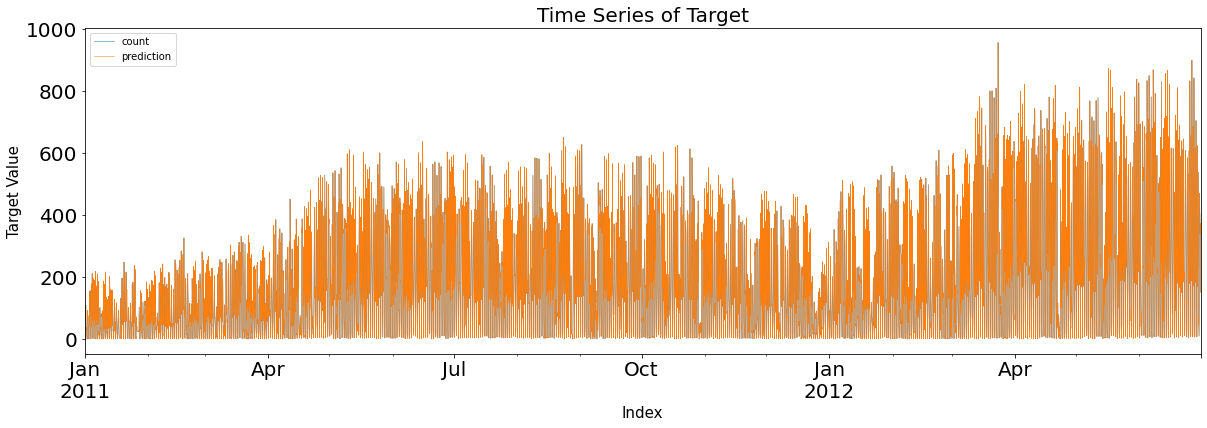

In [10]:
pd.concat([Y_train, pd.DataFrame(pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                               xlim=(Y_train.index.min(),Y_train.index.max()),
                                                                                                               linewidth=0.5, fontsize=20)
plt.title('Time Series of Target', fontsize = 20)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Target Value', fontsize = 15)
plt.show()

In [11]:
MAE = abs(Y_train.values.flatten() - pred_tr_reg1).mean()
MSE = ((Y_train.values.flatten() - pred_tr_reg1)**2).mean()
MAPE = abs((Y_train.values.flatten() - pred_tr_reg1)/Y_train.values.flatten() * 100).mean()

display(pd.DataFrame([MAE, MSE, MAPE], index = ['MAE', 'MSE', 'MAPE'], columns = ['Score']).T)

,MAE,MSE,MAPE
Score,0.01,0.04,0.06


In [15]:
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_nfe.columns if x not in Y_colname + X_remove]
X_train, X_test, Y_train, Y_test = datasplit_ts(raw_nfe, Y_colname, X_colname, '2012-07-01')

In [23]:
fit_reg1 = sm.OLS(Y_train, X_train).fit()
display(fit_reg1.summary())
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1, graph_on = True)
Score_reg1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              2889.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        10:05:15   Log-Likelihood:                         -83421.
No. Observations:               13128   AIC:                                  1.669e+05
Df Residuals:                   13120   BIC:                                  1.669e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season         3.3659      1.286      2.618      0.009       0.846       5.886
holiday       -6.2896      7.466     -0.842      0.400     -20.924       8.345
workingday    10.3553      2.641      3.921      0.000       5.178      15.533
weather        7.1906      2.093      3.436      0.001       3.089      11.292
temp          -7.8544      1.222     -6.429      0.000     -10.249      -5.460
atemp         16.0695      1.095     14.676      0.000      13.923      18.216
humidity      -1.7353      0.063    -27.356      0.000      -1.860      -1.611
windspeed      2.2749      0.136     16.745      0.000       2.009       2.541
==============================================================================
Omnibus:                     2168.771   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3942.747
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       4.672   Cond. No.                         450.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AttributeError: 'numpy.ndarray' object has no attribute 'index'